# DDW TASK 2

## Contribution
- Jia Hui - Brainstormed on features, researching, model experimenting
- Pei Xuan - Brainstormed on features, researching, data cleaning
- Min Khant - Brainstormed on features, researching

## Link to Data Sources
### 
*Number of ICU Admission for United kingdom*
- [ICU Admissions](https://coronavirus.data.gov.uk/details/healthcare)

*Number of Covid Cases for United kingdom*
- [Covid Cases 'owid-covid-data.csv'](https://github.com/owid/covid-19-data/tree/master/public/data)

## Cleaning of Data
*Took data from 30/4/2021 to 8/11/2021*

## All possible models
1. **[Linear Regression](#linear)**
2. **[Polynomial Regression](#poly)**
1. **[Mutiple Regression](#multi)**

## Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Functions

In [2]:
def normalize_z(df):
    # mean with axis 0 is summing the rows
    return (df - df.mean(axis=0)) / df.std(axis=0) 

def get_features_targets(df, feature_names, target_names):
    ### BEGIN SOLUTION
    df_feature = df[feature_names]
    df_target = df[target_names]
    ### END SOLUTION
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns) 
    feature = df_feature.to_numpy()
    number_of_samples = feature.shape[0]
    return np.concatenate((np.ones((number_of_samples,1)), feature), axis=1)

def prepare_target(df_target):
    # to_numpy() removes the first column (header column)
    return df_target.to_numpy()

def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    ### BEGIN SOLUTION
    # get the indexes of the feature 
    indexes = df_feature.index
    # seed the random value 
    if random_state != None:
        np.random.seed(random_state)
    # get the number of test samples to extract 
    k = int(test_size * len(indexes))
    # get the indexes from the features and target to select as test set 
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    ### END SOLUTION
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
  
def r2_score(y, ypred):
    sum_res = np.sum((y - ypred)**2)
    error_tot = y - np.mean(y)
    sum_tot = np.sum(error_tot**2)
    return 1-(sum_res/sum_tot)

def mean_squared_error(target, pred):
    n = target.shape[0]
    return 1/n * np.sum((target-pred)**2)

def compute_cost(X, y, beta):
    J = 0
    
    no_of_samples = X.shape[0]
    error = np.matmul(X, beta) - y
    error_sq = np.matmul(error.T, error) # .T is transpose
    # print(error)
    J = 1/(2*no_of_samples) * error_sq
    return J[0][0]

def gradient_descent(X, y, beta, alpha, num_iters):
    ###
    number_of_samples = X.shape[0]
    J_storage = []
    for i in range(num_iters):
        # STEP 2: compute the derivate with current parameters
        derivative_error = (1/(number_of_samples)) * np.matmul(X.T, (np.matmul(X, beta) - y))
        # STEP 3: update the parameters
        beta = beta - alpha *  derivative_error
        # compute cost at every iteration of beta
        J_storage.append(compute_cost(X, y, beta))
    ### END SOLUTION
    return beta, J_storage

def transform_features_power(df_feature, colname, colname_transformed, value):
    df_feature[colname_transformed] = df_feature[colname]**value
    return df_feature

def add_feature(df_feature, colname_transformed, value):
    df_feature[colname_transformed] = value
    return df_feature

## Reading data from CSV

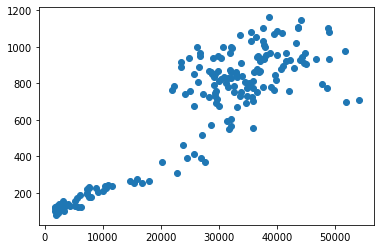

In [3]:
df = pd.read_csv("DDW_dataset1.csv")
df_feature, df_target = get_features_targets(df,["CovidCases"],["ICU admissions"])

plt.scatter(df_feature, df_target)

**Why number of ICU Admissions were used**

## Linear Regression
<a id="linear"></a>

[[608.34541567]
 [322.37436239]]


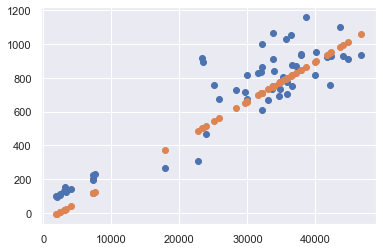

In [4]:
# split data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_feature, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

print(beta)
pred = predict(df_features_test, beta)
# print(pred)

sns.set()
plt.scatter(df_features_test["CovidCases"], df_target_test)
plt.scatter(df_features_test["CovidCases"], pred)

In [5]:
# TESTS
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
print(r2, "r2")

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")


0.7823425561895305 r2
21459.046887849643 mean squared error


## Polynomial Linear Regression
<a id="poly"></a>

     CovidCases  CovidCases^2  CovidCases^3  CovidCases^4  CovidCases^5  \
0          2397  1.211721e+06  1.788076e+06  2.638574e+06  3.893612e+06   
1          1911  8.058779e+05  1.175797e+06  1.715518e+06  2.502986e+06   
2          1674  6.349797e+05  9.203385e+05  1.333937e+06  1.933406e+06   
3          1674  6.349797e+05  9.203385e+05  1.333937e+06  1.933406e+06   
4          1984  8.621345e+05  1.260237e+06  1.842168e+06  2.692813e+06   
..          ...           ...           ...           ...           ...   
188       36963  1.667174e+08  2.820781e+08  4.772629e+08  8.075066e+08   
189       33972  1.432247e+08  2.413093e+08  4.065651e+08  6.849931e+08   
190       30454  1.176413e+08  1.971251e+08  3.303119e+08  5.534858e+08   
191       29889  1.137419e+08  1.904128e+08  3.187657e+08  5.336386e+08   
192       32325  1.309693e+08  2.201133e+08  3.699331e+08  6.217276e+08   

     CovidCases^6  CovidCases^9  
0         5745609  1.968281e+09  
1         3651921  1.055521e+09

C:\Users\jiahu\AppData\Local\Temp/ipykernel_2656/3108061555.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature[colname_transformed] = df_feature[colname]**value


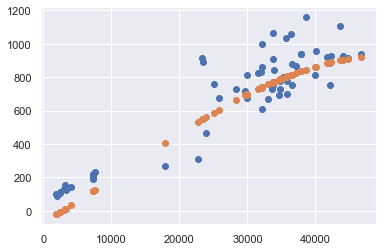

In [6]:

df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^2', 1.8)
df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^3', 1.85)
df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^4', 1.9)
df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^5', 1.95)
df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^6', 2)
# df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^7', 2.05)
# df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^8', 2.5)
df_features_second = transform_features_power(df_feature, 'CovidCases', 'CovidCases^9', 2.75)
print(df_features_second)


df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_second, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((8,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# print(beta)
pred = predict(df_features_test, beta)
# print(pred)

sns.set()
plt.scatter(df_features_test["CovidCases"], df_target_test)
plt.scatter(df_features_test["CovidCases"], pred)


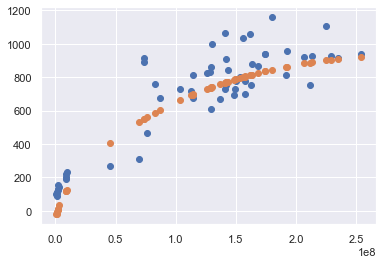

In [7]:
plt.scatter(df_features_test["CovidCases^2"], df_target_test)
plt.scatter(df_features_test["CovidCases^2"], pred)

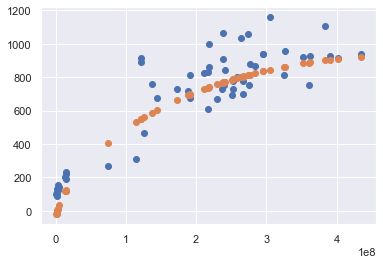

In [8]:
plt.scatter(df_features_test["CovidCases^3"], df_target_test)
plt.scatter(df_features_test["CovidCases^3"], pred)

In [9]:
# TESTS
target = prepare_target(df_target_test)

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")


# 19641,  2 & 2.7
# 19638, 2 & 2.75
# 19631, 1.9 & 2.75
# 19629, 1.85 & 2.75
# 19591, 1.85, 1.9, 2.75
# 19570 1.8, 1.85, 1.9, 2.75
# 19553 1.8, 1.85, 1.9, 1.95, 2, 2.75

19553.910372020826 mean squared error


## Multiple Linear Regression
<a id="multi"></a>

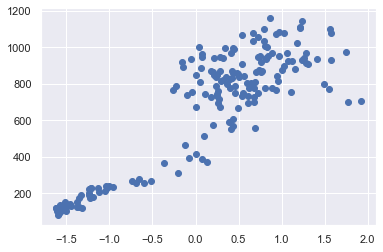

In [10]:
df_features, df_target = get_features_targets(df,["CovidCases", "Delta"],["ICU admissions"])

# df_features = transform_features_power(df_features, 'CovidCases', 'CovidCases^2', 2)
# df_features = transform_features_power(df_features, 'Delta', 'Delta^2', 2)
# print(df_features)
df_features = normalize_z(df_features)
# print(df_features)

plt.scatter(df_features["CovidCases"], df_target)
# plt.scatter(df_features["CovidCases^2"], df_target)


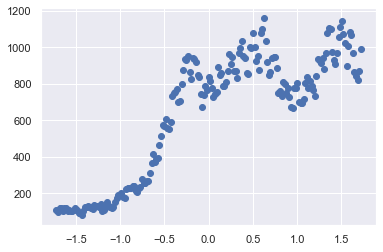

In [11]:
plt.scatter(df_features["Delta"], df_target)
# plt.scatter(df_features["Delta^2"], df_target)

[[608.34541567]
 [183.91745203]
 [162.57032638]]


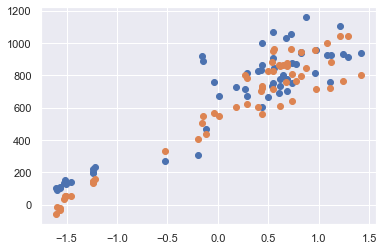

In [12]:
df_features_third = df_features

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features_third, df_target)

# normalize features
df_features_train_z = normalize_z(df_features_train)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((3,1))
# beta = np.zeros((5,1))

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

print(beta)
pred = predict(df_features_test, beta)
# print(pred)

plt.scatter(df_features_test["CovidCases"], df_target_test)
plt.scatter(df_features_test["CovidCases"], pred)

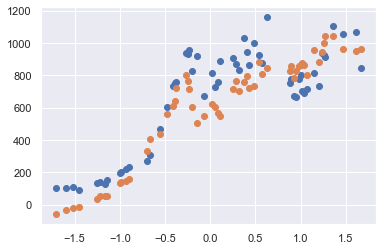

In [13]:
plt.scatter(df_features_test["Delta"], df_target_test)
plt.scatter(df_features_test["Delta"], pred)

In [14]:
# TESTS
target = prepare_target(df_target_test)

mse = mean_squared_error(target, pred)
print(mse, "mean squared error")

22751.944377117696 mean squared error


## Model Evaluation

Steps taken to improve accuracy of model
1. Logging features
2. Adjusting the power of polynomial linear regression model
3. Research for other possible features


*After trying out several models, we conclude that polynomial linear regression suit our data the best with mean squared error of 19553.9*